In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

## 人工データの生成

In [2]:
np.random.seed(0)

N = 50
X = np.random.rand(N, 2)
w = np.array([10, 20])
noise = np.random.randn(N)
y = X @ w + noise

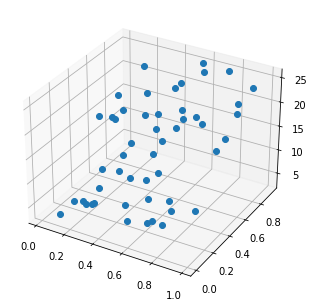

In [3]:
fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
ax.plot(*X.T, y, marker="o", linestyle='None')

## 格子点の生成

以下のセルはこちらのコードと等価。

```python
w1 = np.linspace(-30, 30, M)
w2 = np.linspace(-30, 30, M)
W = np.array(np.meshgrid(w1, w2).T)
```

In [4]:
M = 100
W = np.mgrid[-30:30:M * 1j, -30:30:M * 1j]

## Lasso 回帰
カッコつけてるけどWを4次元にしない実装の方が絶対読みやすい。

In [5]:
y = y.reshape(-1,    1, 1)
X = X.reshape(-1, 2, 1, 1)
W = W.reshape( 1, 2, M, M)
y_hat = np.sum(X * W, axis=1)

alpha = 30
E = np.sum(np.abs(y - y_hat), axis=0)
R = np.sum(np.abs(W), axis=1).squeeze()
L = E + alpha * R

W = W.squeeze()

## 二乗和誤差と正則化二乗和誤差の可視化

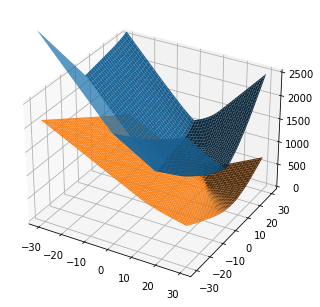

In [6]:
fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

ax.plot_surface(*W, L)
ax.plot_surface(*W, E)
# ax.contour(*W, L, colors="black", offset=-1)
ax.set_zlim3d(0, 2500)
plt.show()